# Introduction

In part 1 of this assessment, you will complete several requested SQL queries in order to extract data, analyze, and provide insights from a single provided SQL database. You will also visualize the key results of 3 of these queries. There are also several 'Reflection' questions that ask you to write out a text based answer in the provided markdown cell. Following the guided question and answer section, in part 2 you will explore a second dataset on your own using SQL in order to conduct a preliminary analysis. You will be asked to produce a very short slide presentation highlighting the work you did for this second section.

## Objectives
You will be able to:
- Interpret "word problems" and translate them into SQL queries
- Decide and perform whichever type of JOIN is best for retrieving desired data
- Use GROUP BY statements to apply aggregate functions like COUNT, MAX, MIN, and SUM
- Use the HAVING clause to compare different aggregates
- Write subqueries to decompose complex queries
- Visualize data using matplotlib, seaborn, or pandas
- Choose the correct chart type based on the given data


## Part 1: Guided SQL Queries

### Your Task: Querying a Customer Database

![toy car picture](images/toycars.jpg)


### Business Understanding
Your employer sells wholesale miniature models of products such as classic cars, motorcycles, and planes. They want you to pull several reports on different segments of their past customers, in order to better understand past sales as well as determine which customers will receive promotional material. They are also interested in investigating which products have performed the best, as well as having several smaller asks.

In addition to providing the requested data from the SQL database you have also been asked to create some basic visuals to display some of the more insightful information. It is up to your discretion to choose the correct plot/chart type for the data in question. **Questions that want you to visualize the results will be explicitly marked**.

### Data Understanding
You may remember this database from a previous lab. As a refresher, here's the ERD diagram for this database:

![ERD picture](images/ERD.png)

The queries you are asked to write will become more complex over the course of the lab.



### Getting Started
For this assessment you are expected to make use of both sqlite3 and the Pandas libraries in order to write, execute, and return SQL queries as a Pandas DataFrame. Assign each returned answer as its own explicit variable.

For the visualization piece you are expected to utilize either Pandas, Seaborn, or Matplotlib to create your visuals. Make sure you are providing verbose labels and titles according to the data you are being asked to visualize. Do not worry too much about choosing a 'style' or 'context' instead focus on conveying the requested information correctly.

### Step 1: Connect to Data

In the cell below
- Import the necessary libraries
- Establish a connection to the database data.sqlite

In [1]:
# Replace None with your code
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create connection to database
conn =sqlite3.connect('data.sqlite')

### Step 2: Limited Edition California Product
The California sales rep team is interested in running promotional material for a new limited edition model they are releasing based on the famous San Francisco Cable Cars. This product will only be available to customer stores based in California and given its high price value they want to first target promotional material to existing California customers with a high credit limit. Upon communicating with the accounting department, a credit limit of over 25,000 is considered to be high. 

Execute a SQl query that returns which customers the sales rep team wants to market to first.

In [2]:
# Replace None with your code
q= """
SELECT customerNumber, customerName, state, creditLimit
FROM customers
WHERE state ='CA' AND creditLimit > 25000
"""
california_highcredit_customers =pd.read_sql(q, conn)
california_highcredit_customers

,customerNumber,customerName,state,creditLimit
0,124,Mini Gifts Distributors Ltd.,CA,210500.00
1,129,Mini Wheels Co.,CA,64600.00
2,161,Technics Stores Inc.,CA,84600.00
3,205,Toys4GrownUps.com,CA,90700.00
4,219,Boards & Toys Co.,CA,11000.00
5,239,Collectable Mini Designs Co.,CA,105000.00
6,321,Corporate Gift Ideas Co.,CA,105000.00
7,347,"Men 'R' US Retailers, Ltd.",CA,57700.00
8,450,The Sharp Gifts Warehouse,CA,77600.00
9,475,West Coast Collectables Co.,CA,55400.00


### Step 3: International Collectable Campaign

The international sales rep team has reached out to you to help them identify partners for a 'Collectable' marketing campaign that highlights the potential collectors value in purchasing these model kits. They want to try and promote a 'collect them all' mentality. The team had a great idea to partner with any of their international customers (non-US) who have "Collect" in their name as a tie in to the larger theme.

Execute a SQL that returns the customers in question.

In [3]:
# Replace None with your code
q= """
SELECT customerNumber, customerName, country
FROM customers
WHERE country != 'USA' AND customerName LIKE '%collect%'
"""
international_collect_customers =pd.read_sql(q,conn)
international_collect_customers 

,customerNumber,customerName,country
0,114,"Australian Collectors, Co.",Australia
1,189,"Clover Collections, Co.",Ireland
2,201,"UK Collectables, Ltd.",UK
3,211,"King Kong Collectables, Co.",Hong Kong
4,227,Heintze Collectables,Denmark
5,260,"Royal Canadian Collectables, Ltd.",Canada
6,293,BG&E Collectables,Switzerland
7,353,Reims Collectables,France
8,376,Precious Collectables,Switzerland
9,382,Salzburg Collectables,Austria


## Reflection Question:

Describe the WHERE clause you used in the above query to a non-technical manager who wants to be ensured that you are properly filtering and only selecting the requested data. How is the operator and conditional expression you are using acting to accomplish this?

## Type your answer in markdown here!
The WHERE clause in querry filters the required customers we need. In the above case, WHERE querry filters for customers particularly in California 
('state = 'CA') and who have a high credit limit over 25000. Using the AND operator, made sure that both conditions must be met for a customer to be 
included in the results. Hence, we are not just looking anyone in California or anyone with a high credit limt but also complying both criteria at same 
time. As a result, we got the exact group without missing or extra customers.

### Step 4: USA Credit and Inventory Policy - Visual Required
The USA based product team is planning to adjust its credit policies and inventory allocation strategy based on the average credit limit of its customers. They would like to target this strategy at a state level with several goals in mind. 
1. Optimize inventory distribution:
    - States with higher average credit limits might be able to place larger orders, justifying priority in inventory allocation.
    - This could help ensure that states with more purchasing power always have products in stock.
2. Tailor credit policies:
    - Adjust credit limits for new customers based on the state average.
    - Identify states where they might be too conservative or too liberal with credit limits.
3. Target marketing and sales efforts:
    - Focus promotional campaigns on states with higher credit limits, potentially leading to larger orders.
    - Develop strategies to increase sales in states with lower average credit limits.

Execute a SQl query that returns the information required to address this ask.

In [4]:
# Replace None with your code
q= """
SELECT state, AVG(creditLimit) AS avg_credit_limit, COUNT(*) as customer_count
FROM customers
WHERE country ='USA' AND state IS NOT NULL
GROUP BY state
ORDER BY avg_credit_limit DESC
"""
usa_credit_data=pd.read_sql(q,conn)
usa_credit_data

,state,avg_credit_limit,customer_count
0,NH,114200.000000,1
1,NY,89966.666667,6
2,PA,84766.666667,3
3,CA,83854.545455,11
4,NV,71800.000000,1
5,MA,70755.555556,9
6,CT,57350.000000,4
7,NJ,43000.000000,1


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

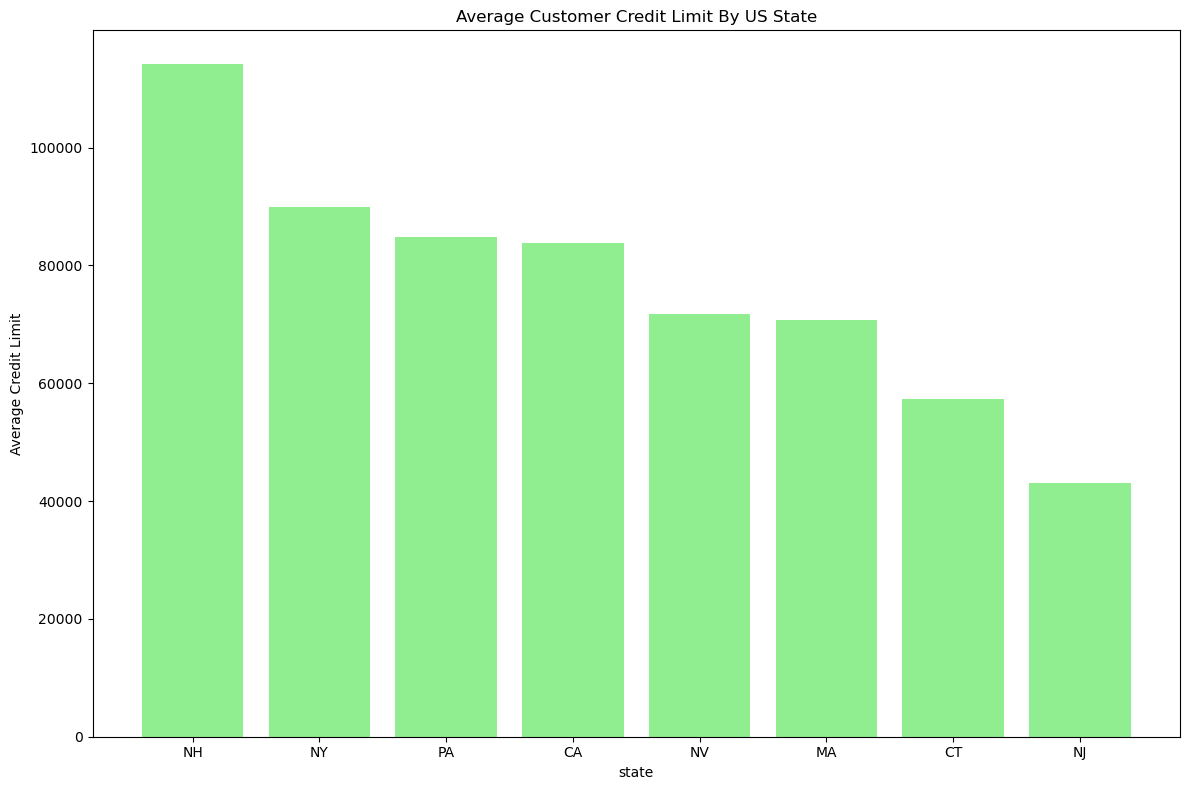

In [8]:
# Replace None with your visual code
# Produce a visual to represent the average credit limit by state
plt.figure(figsize=(12,8))
plt.bar(usa_credit_data['state'],usa_credit_data['avg_credit_limit'],color='lightgreen')
plt.title('Average Customer Credit Limit By US State')
plt.xlabel('state')
plt.ylabel('Average Credit Limit')
plt.tight_layout()
plt.show()
           

### Step 5: Top Customers - Visual Required
The company is approaching its 10 year anniversary and wants to acknowledge and thank its top customers with personalized communication. They have asked you to determine the top 10 customers based on the total amount of payments made, making sure to return the customer name for clarity. 

Execute a SQl query that returns the information required to address this ask.


In [10]:
# Replace None with your code
q= """
SELECT c.customerName, SUM(p.amount)
FROM customers c
JOIN payments p ON c.customerNumber = p.customerNumber
GROUP BY c.customerNumber, c.customerName
ORDER BY SUM(p.amount) DESC
LIMIT 10
"""
top_customers = pd.read_sql(q, conn)
top_customers

,customerName,SUM(p.amount)
0,Euro+ Shopping Channel,715738.98
1,Mini Gifts Distributors Ltd.,584188.24
2,"Australian Collectors, Co.",180585.07
3,Muscle Machine Inc,177913.95
4,"Dragon Souveniers, Ltd.",156251.03
5,"Down Under Souveniers, Inc",154622.08
6,"AV Stores, Co.",148410.09
7,"Anna's Decorations, Ltd",137034.22
8,Corporate Gift Ideas Co.,132340.78
9,"Saveley & Henriot, Co.",130305.35


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

C:\Users\sushm\AppData\Local\Temp\ipykernel_44400\2976517926.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SUM(p.amount)', y='customerName', data=top_customers, palette ='crest')


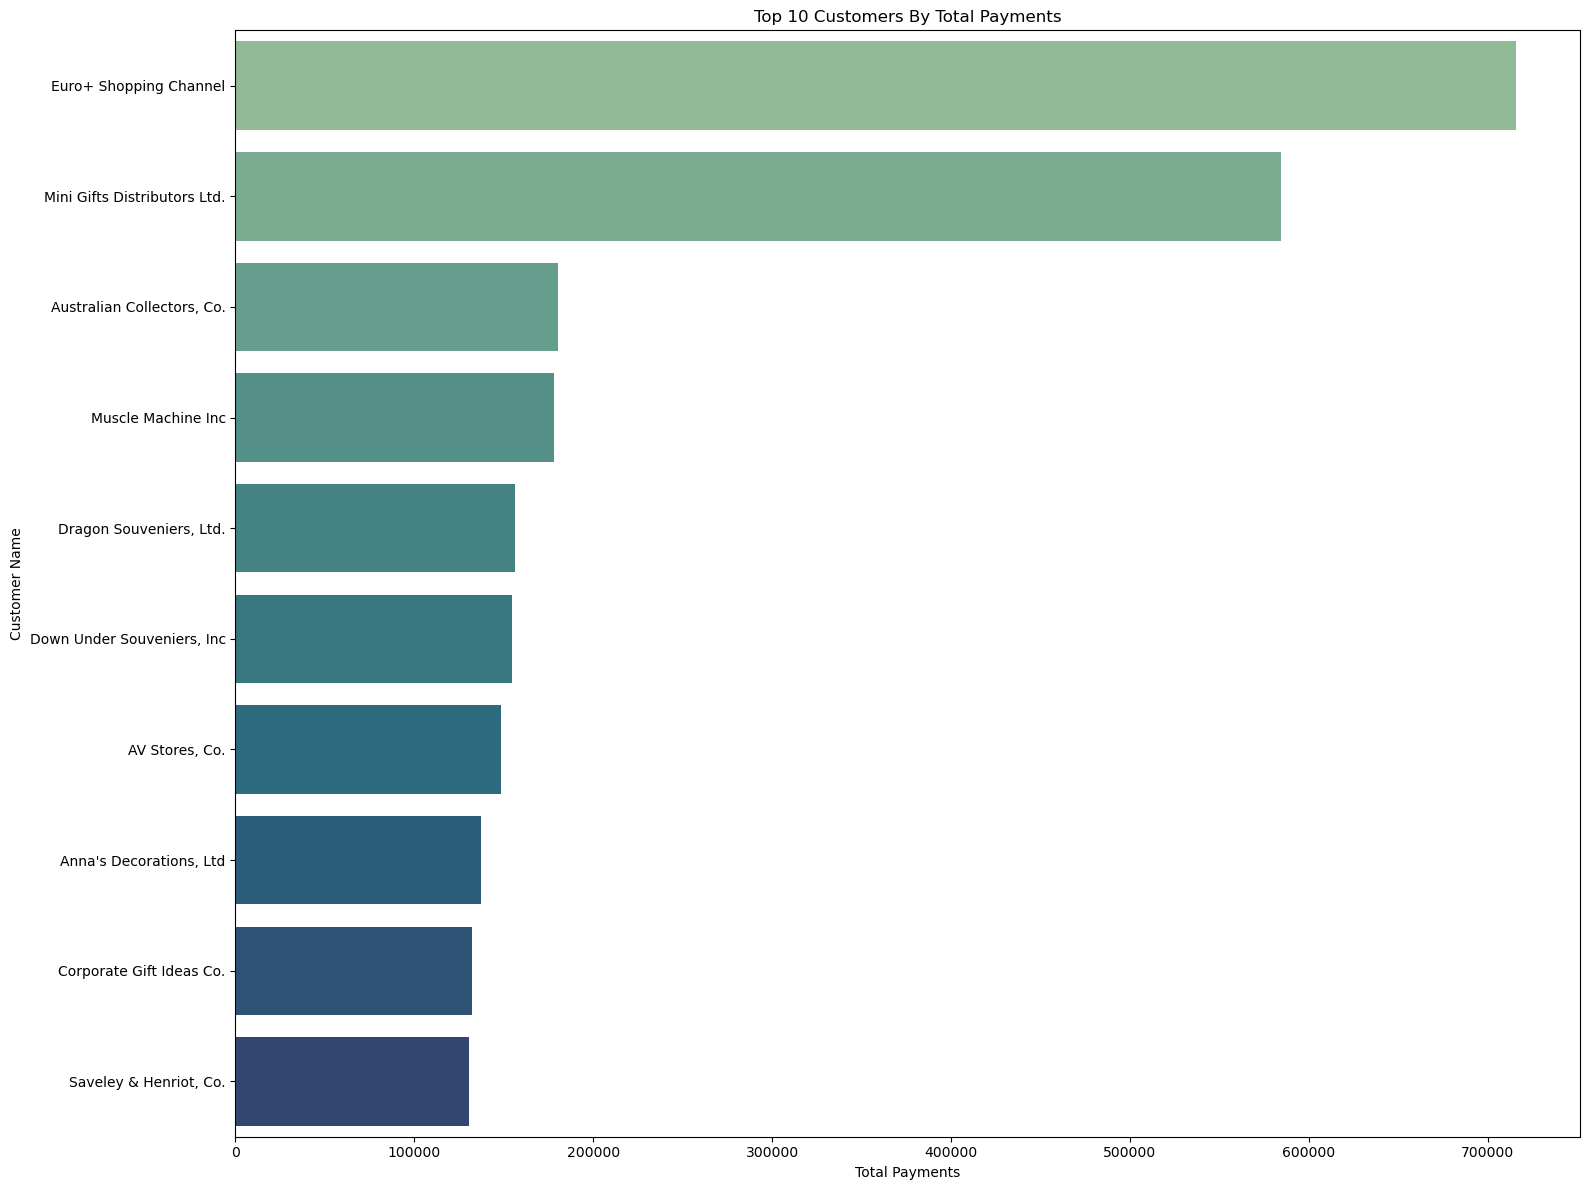

In [11]:
# Replace None with your visual code
# Produce a visual to represent the top ten customers in terms of total payments
plt.figure(figsize=(16,12))
sns.barplot(x='SUM(p.amount)', y='customerName', data=top_customers, palette ='crest')
plt.title('Top 10 Customers By Total Payments')
plt.xlabel('Total Payments')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()

### Step 6: Top Customer + Product Quantities
The product team is running an analysis on popular and common products sold to each customer in order to try and determine what new products they should be looking at to include in their catalog. This data will also be used by individual sales reps to recommend similar products to each customer next time they place an order. 

They have asked you to query information, for each customer, about any product they have purchased 10 or more units of. In addition they would like the full set of data to be sorted in ascending order by the total amount purchased.

Execute a SQl query that returns the information required to address this ask.

Hint: For this one, you'll need to make use of HAVING, GROUP BY, and ORDER BY — make sure you get the order of them correct!

In [12]:
# Replace None with you code
q="""
SELECT
    c.customerName,
    p.productCode,
    p.productName,
    SUM(od.quantityOrdered) AS total_quantity
FROM customers c
JOIN orders o ON c.customerNumber = o.customerNumber
JOIN orderdetails od ON o.orderNumber = od.orderNumber
JOIN products p ON od.productCode = p.productCode
GROUP BY c.customerName, p.productCode, p.productName
HAVING total_quantity > 10
ORDER BY total_quantity ASC
"""
customer_product_quantities =pd.read_sql(q,conn)
customer_product_quantities

,customerName,productCode,productName,total_quantity
0,La Rochelle Gifts,S32_2509,1954 Greyhound Scenicruiser,11
1,Tekni Collectables Inc.,S700_1691,American Airlines: B767-300,11
2,The Sharp Gifts Warehouse,S24_3191,1969 Chevrolet Camaro Z28,13
3,L'ordine Souveniers,S18_2581,P-51-D Mustang,15
4,Salzburg Collectables,S24_2972,1982 Lamborghini Diablo,15
...,...,...,...,...
2524,Euro+ Shopping Channel,S24_3432,2002 Chevy Corvette,174
2525,Euro+ Shopping Channel,S12_4473,1957 Chevy Pickup,183
2526,Euro+ Shopping Channel,S24_1444,1970 Dodge Coronet,197
2527,Euro+ Shopping Channel,S24_2840,1958 Chevy Corvette Limited Edition,245


### Step 7: Product Analysis - Visual Required

The product team is looking into the demand across its different product lines. They are conducting a comprehensive review of its product portfolio and inventory management strategies. You have been asked to query data pertaining to each different product line, that contains the total quantity ordered and the total number of products for each respective product line. By examining the number of products and total quantity ordered for each product line, the company aims to:
1. Optimize product mix:
    - Identify which product lines have the most diverse offerings (high number of products)
    - Determine which lines are most popular (high total quantity ordered)
    - Compare if lines with more products necessarily lead to more orders
2. Improve inventory management:
    - Adjust stock levels based on the popularity of each product line
    - Identify potential overstocking in lines with low order quantities
    - Ensure adequate variety in high-performing product lines
3. Adjust marketing strategy:
    - Focus promotional efforts on product lines with high potential (many products but lower order quantities)
    - Capitalize on the popularity of high-performing lines in marketing campaigns
4. Advise Product development:
    - Invest in expanding product ranges for lines with high order quantities
    - Consider phasing out or revamping product lines with low numbers of products and low order quantities

Hint: Think about how you can and might have to utilize SQL DISTINCT statement

Execute a SQl query that returns the information required to address this ask.

In [13]:
# Replace None with your code
q= """
SELECT
    p.productLine,
    COUNT(DISTINCT p.productCode) AS total_products,
    SUM(od.quantityOrdered) AS total_quantity_ordered
FROM products p
JOIN orderdetails od ON p.productCode = od.productCode
GROUP BY p.productLine
ORDER BY total_quantity_ordered DESC
"""
product_analysis =pd.read_sql(q,conn)
product_analysis


,productLine,total_products,total_quantity_ordered
0,Classic Cars,37,35582
1,Vintage Cars,24,22933
2,Motorcycles,13,12778
3,Planes,12,11872
4,Trucks and Buses,11,11001
5,Ships,9,8532
6,Trains,3,2818


Once you have the information returned in a dataframe, select an appropriate visualization to represent the relationship between total quantity ordered and the number of products in order to perform a preliminary investigation into the question of if more products lead to more orders. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

<function matplotlib.pyplot.show(close=None, block=None)>

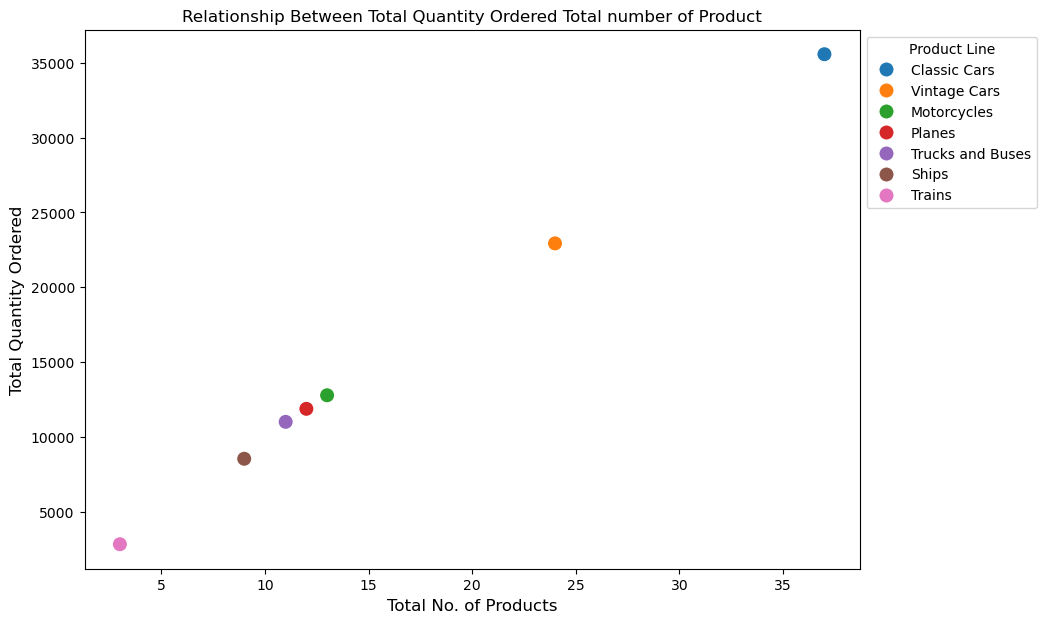

In [15]:
# Replace None with your visual code
# Produce a visual to represent the the relation between number of products and the total amount ordered
plt.figure(figsize=(10,7))
sns.scatterplot( data=product_analysis, x= "total_products", y="total_quantity_ordered", hue ="productLine", s=120)
plt.title("Relationship Between Total Quantity Ordered Total number of Product", fontsize=12)
plt.xlabel("Total No. of Products", fontsize =12)
plt.ylabel("Total Quantity Ordered", fontsize =12)
plt.legend(title="Product Line", bbox_to_anchor=(1.0,1), loc='upper left')
plt.tight_layout
plt.show

## Reflection Question:

Please explain your choice in the type of visual you used in order to highlight and represent the data from the above query. In a non-technical manner explain why that chart type makes sense for the information being conveyed. What does this visual convey in the context of the question it was asked for?

## Type your answer in markdown here!
I chose a scatter plot beacuase it is a simple chart to represent the relationship between number of products in each product line and total items ordered. In this chart, each dot shows a product line, and its positions shows if line with more products are also selling more items.This chart makes us easy to spot trends and compare product lines. It helps us to understand which lines are doing well and where the company could improve its product mix.

### Step 8: Remote Offices
Upper management is considering a shift to hybrid and remote work for certain locations and roles. They have tasked you with providing them data about employees who work in any office that has fewer than 5 total employees so they can better understand how to support those employees remotely when offices are shut down. 

Be sure to include information about the employees job and supervisor so management can adjust everyone to remote work properly.

Hint: Utilize a subquery to find the relevant offices

Execute a SQl query that returns the information required to address this ask.

In [17]:
# Replace None with your code
q="""
SELECT 
    e.employeeNumber,
    e.firstName,
    e.lastName,
    e.jobTitle,
    e.officeCode,
    o.city,
    o.country
FROM employees e
JOIN offices o ON e.officeCode =o.officeCode
WHERE e.officeCode IN (
    SELECT officeCode
    FROM employees
    GROUP BY officeCode
    HAVING COUNT(*) <5
    )
ORDER BY e.officeCode, e.employeeNumber;
"""
Other_office_employees =pd.read_sql(q, conn)
Other_office_employees

,employeeNumber,firstName,lastName,jobTitle,officeCode,city,country
0,1188,Julie,Firrelli,Sales Rep,2,Boston,USA
1,1216,Steve,Patterson,Sales Rep,2,Boston,USA
2,1286,Foon Yue,Tseng,Sales Rep,3,NYC,USA
3,1323,George,Vanauf,Sales Rep,3,NYC,USA
4,1621,Mami,Nishi,Sales Rep,5,Tokyo,Japan
5,1625,Yoshimi,Kato,Sales Rep,5,Tokyo,Japan
6,1088,William,Patterson,Sales Manager (APAC),6,Sydney,Australia
7,1611,Andy,Fixter,Sales Rep,6,Sydney,Australia
8,1612,Peter,Marsh,Sales Rep,6,Sydney,Australia
9,1619,Tom,King,Sales Rep,6,Sydney,Australia


## Reflection Question:

Describe how you decided on the subquery that you used in the query above? This answer can be technically in nature, describing your thought process in how the main query is utilizing the subquery to return the correct data.

## Type your answer in markdown here!
I decided to use a subquery to find offices with fewer than 5 employees by grouping them by office code and applying HAVING COUNT(*) <5. This lets us target only small offices management is interested in. Then, in main query, I used a WHERE IN clause to get details of employees who work in those offices, including their job titles and supervisors. This method keeps the query clear and focused.

### Step 9: Close the Connection

Now that you are finished executing your queries and retrieving the required information you always want to make sure to close the connection to your database.

In [18]:
# Replace None with your code
conn.close()

### End of Guided Section
In this initial portion of the assessment, you produced several data queries and visualizations for a model company, mainly focused around its customer and product data. You wrote and engineered specific SQL queries to address pertinent questions and asks from the company. Along the way, you utilized many of the major concepts and keywords associated with SQL SELECT queries: FROM, WHERE, GROUP BY, HAVING, ORDER BY, JOIN, SUM, COUNT, and AVG.

## Part 2: Exploratory Analysis with SQL
In this open-ended exploratory section, you will analyze real-world data from the movie industry. As a data analyst, you have the freedom to investigate questions and topics that intrigue you within this dataset. The database schema and Entity-Relationship Diagram (ERD) are provided below for your reference. A general overview and instructions are also provided below.

In [19]:
# Run this cell without changes
import zipfile

zip_file_path = 'im.db.zip'
extract_to_path = './'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

# Connection
conn4 = sqlite3.connect('im.db')

# Schema
schema_df = pd.read_sql("""
SElECT * FROM sqlite_master                        
""", conn4)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


## The Data

![movie ERD](images/movie_data_erd.jpeg)
### Database Content:

- Source: IMDB
- Time Range: Movies released between 2010 and 2019
- Note: Exclude any movies with a start_year after 2019 as this data is not current or accurate

Available Data Categories:
- Genre
- Runtime
- Personnel (writers, directors, actors)
- Movie ratings

### Objectives:

Initial Exploration:
- Use SQL in combination with Pandas to explore the database
- Identify interesting trends, patterns, or relationships in the data

Business Question Formulation:
- Develop at least one substantial business question for deeper analysis
- Ensure the question is relevant, specific, and can be addressed with the available data

Data Cleaning Assessment:
- Identify potential data cleaning tasks necessary for your deeper analysis
- Note: You are not required to perform the cleaning, only to recognize and list the necessary tasks

Null Value Handling:
- Be aware that the dataset contains null values in certain fields
- Exclude these null values from your exploration
- Do not attempt to input or fill in missing information

### Deliverables:

You need to produce a short slide presentation (3-5 slides) that highlights the three key deliverables below. Utilize a data visualization to support the second deliverable.

1. A summary of your initial data exploration findings
    - Can be bulleted or sentence form
2. At least one well-formulated business question for further analysis
    - Should stem from a relevant trend or pattern your initial exploration identified
3. A list of potential data cleaning tasks identified during your exploration
    - This can and should include things like data normalization/standardization and null handling

Tips for Success:

Begin with broad exploratory queries to understand the data's scope and content. Then focus on honing in on interesting relationships between different data categories. Consider industry trends, audience preferences, or financial aspects when formulating your business question. Pay attention to data quality issues, inconsistencies, or limitations that might affect your analysis. Remember, the goal is to demonstrate your analytical thinking and ability to derive meaningful insights from complex datasets. Good luck with your exploration!

NOTE: You do not need to explore every aspect of this database. Find something that you think is interesting or relevant about the data and focus your exploration there.

In [22]:
#  Step-1 Initial Exploration-List all tables and columns

schema_df[['name', 'type']]
            

,name,type
0,movie_basics,table
1,directors,table
2,known_for,table
3,movie_akas,table
4,movie_ratings,table
5,persons,table
6,principals,table
7,writers,table


In [23]:
# 1.1 looking inside each movie_basics
pd.read_sql("""SELECT* FROM movie_basics ;""", conn4)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [24]:
#1.2  looking inside each table--Ratings
pd.read_sql("SELECT* FROM movie_ratings LIMIT 5;",conn4)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [25]:
# 1.3 directors
pd.read_sql("SELECT* FROM directors LIMIT 5;",conn4)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [26]:
# 1.4 movie_akas
pd.read_sql("SELECT* FROM movie_akas LIMIT 5;",conn4)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [27]:
# 1.5 known_for
pd.read_sql("SELECT* FROM known_for LIMIT 5;",conn4)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [28]:
# 1.6 principals
pd.read_sql("SELECT* FROM principals LIMIT 5;",conn4)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [29]:
# 1.7 persons
pd.read_sql("SELECT* FROM persons LIMIT 5;",conn4)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,None,None,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,None,None,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,None,None,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,None,None,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,None,None,"production_designer,art_department,set_decorator"


In [30]:
# STEP-2 Identify interesting trends, patterns, or relationships in the data.

# 2.a. Top 10 Movies with Highest Ratings
top_movies = pd.read_sql("""
SELECT mb.primary_title, mr.averagerating, mr.numvotes
FROM movie_basics mb
JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
ORDER BY mr.averagerating DESC, mr.numvotes DESC
LIMIT 10;
""", conn4)
top_movies

,primary_title,averagerating,numvotes
0,Renegade,10.0,20
1,Revolution Food,10.0,8
2,Fly High: Story of the Disc Dog,10.0,7
3,I Was Born Yesterday!,10.0,6
4,All Around Us,10.0,6
5,Ellis Island: The Making of a Master Race in A...,10.0,6
6,Calamity Kevin,10.0,6
7,Exteriores: Mulheres Brasileiras na Diplomacia,10.0,5
8,The Dark Knight: The Ballad of the N Word,10.0,5
9,Freeing Bernie Baran,10.0,5


In [31]:
# 2.b Most Common Genres.
genre_df = pd.read_sql(" SELECT genres FROM movie_basics WHERE genres IS NOT NULL;", conn4)
genre_df


,genres
0,"Action,Crime,Drama"
1,"Biography,Drama"
2,Drama
3,"Comedy,Drama"
4,"Comedy,Drama,Fantasy"
...,...
140731,"Adventure,History,War"
140732,Drama
140733,Documentary
140734,Comedy


In [32]:
genre_counts = genre_df['genres'].str.split(',',expand=True).stack().value_counts()
genre_counts= genre_counts.reset_index()
genre_counts.columns=['genre','count']

# Display the top 10 most common genres
genre_counts.head(10)

,genre,count
0,Documentary,51640
1,Drama,49883
2,Comedy,25312
3,Thriller,11883
4,Horror,10805
5,Action,10335
6,Romance,9372
7,Biography,8722
8,Crime,6753
9,Adventure,6465


In [33]:
# 2.c. Most Prolific Directors (by Number of Movies Directed)

top_directors = pd.read_sql("""
SELECT d.person_id, p.primary_name, COUNT(*) AS num_movies
    FROM directors d
    JOIN persons p ON d.person_id = p.person_id
    GROUP BY d.person_id
    ORDER BY num_movies DESC
    LIMIT 10;
    """, conn4)

top_directors

,person_id,primary_name,num_movies
0,nm6935209,Tony Newton,238
1,nm2563700,Jason Impey,190
2,nm1546474,Shane Ryan,185
3,nm3877467,Ruben Rodriguez,180
4,nm3848412,Sam Mason-Bell,144
5,nm6078996,Martin Sonntag,135
6,nm4341114,Dustin Ferguson,121
7,nm4921301,Gav Chuckie Steel,119
8,nm3079464,Corey Norman,114
9,nm4542885,Evan Marlowe,101


In [34]:
# B. Business Question Formulation: 
# Develope at least one substantial business question for deeper analysis
# ANS; Which directors or writers consistently produce high-rated movies, and do they spealize in specific generes?

In [35]:
# merging directors table with ratings & generes
directors_movie = pd.read_sql("""
SELECT d.person_id, p.primary_name, mb.genres, mr.averagerating
FROM directors d
JOIN persons p ON d.person_id = p.person_id
JOIN movie_basics mb ON d.movie_id = mb.movie_id
JOIN movie_ratings mr ON d.movie_id = mr.movie_id
""", conn4)
directors_movie.head(5)

,person_id,primary_name,genres,averagerating
0,nm0899854,Tony Vitale,Comedy,3.9
1,nm1940585,Bill Haley,Drama,5.5
2,nm0151540,Jay Chandrasekhar,Comedy,5.0
3,nm0151540,Jay Chandrasekhar,Comedy,5.0
4,nm0089502,Albert Pyun,Thriller,5.8


In [36]:
# Merging Writers with ratings and genres
writer_movies = pd.read_sql("""
SELECT w.person_id, p.primary_name, mb.genres, mr.averagerating
FROM writers w
JOIN persons p ON w.person_id = p.person_id
JOIN movie_basics mb ON w.movie_id= mb.movie_id
JOIN movie_ratings mr ON w.movie_id = mr.movie_id
""", conn4)
writer_movies.head()


,person_id,primary_name,genres,averagerating
0,nm0899854,Tony Vitale,Comedy,3.9
1,nm1940585,Bill Haley,Drama,5.5
2,nm0310087,Peter Gaulke,Comedy,5.0
3,nm0841532,Gerry Swallow,Comedy,5.0
4,nm0284943,Randall Fontana,Thriller,5.8


In [39]:
# Group by directors, calculating mean rating and count of movies
top_directors = directors_movie.groupby(['person_id','primary_name'])['averagerating'].agg(['mean', 'count']).reset_index()
top_directors = top_directors[top_directors['count'] >=3]
top_directors = top_directors.sort_values(by='mean',ascending = False)
top_directors.head()

,person_id,primary_name,mean,count
40074,nm4535538,Tyler Chandler,9.7,3
2988,nm0214193,Julie Simone,9.6,3
18864,nm1671966,D. Todd Deeken,9.5,4
55570,nm8961211,Jean Griesser,9.5,3
55571,nm8961212,Lauren Ross,9.5,3


In [40]:
# Group by writers, calculating mean rating and count of movies
top_writers = writer_movies.groupby(['person_id','primary_name'])['averagerating'].agg(['mean','count']).reset_index()
top_writers = top_writers[top_writers['count']>=3]
top_writers = top_writers.sort_values(by='mean', ascending=False)
top_writers.head()

,person_id,primary_name,mean,count
15163,nm10106074,Mukunda Das,9.5,3
73655,nm8961211,Jean Griesser,9.5,3
10469,nm0689168,Alexander Polinsky,9.4,3
64301,nm6495404,Pedro Jorge,9.4,3
61891,nm6041686,Anjana Krishnakumar,9.4,3


In [46]:
# for each top directors, analyzing which genres they work in.
director_genres =(
    directors_movie
    .groupby(['person_id','primary_name'])['genres']
    .apply(lambda x:','.join([str(genre) for genre in x if pd.notnull(genre)]))
    .reset_index()
)
director_genres.head()

,person_id,primary_name,genres
0,nm0000080,Orson Welles,"Drama,Drama"
1,nm0000095,Woody Allen,"Comedy,Drama,Comedy,Fantasy,Romance,Comedy,Rom..."
2,nm0000108,Luc Besson,"Action,Adventure,Fantasy,Action,Adventure,Fant..."
3,nm0000110,Kenneth Branagh,"Drama,Action,Drama,Thriller,Action,Drama,Thril..."
4,nm0000118,John Carpenter,"Horror,Mystery,Thriller,Horror,Mystery,Thriller"


In [ ]:
# C. Data Cleaning Assessment 
# It consists of following activities
"""
checking duplicates data
update data by deleting duplicate data ( we will not delete data as per question)
update missings values to NA
Sanity Check
"""

In [48]:
# c1.
 # Check duplicate datas in movie_basic table
pd.read_sql("""
SELECT
    primary_title, start_year, genres, runtime_minutes, 
    COUNT(*) as duplicate_count
FROM movie_basics
GROUP BY primary_title, start_year, genres, runtime_minutes
HAVING COUNT(*) >1;
""", conn4)

,primary_title,start_year,genres,runtime_minutes,duplicate_count
0,100 Milioni di bracciate,2017,Biography,NaN,2
1,3. Elma,2014,Drama,65.0,3
2,8:30,2017,Mystery,70.0,2
3,A Hungarian Symphony,2015,Documentary,13.0,2
4,Aitebaar,2017,Comedy,80.0,2
...,...,...,...,...,...
115,Weathered Secrets,2015,None,58.0,2
116,Witchcraft Blue,2017,Documentary,96.0,2
117,Zaatari Djinn,2016,Documentary,90.0,2
118,Zero Point Five Love,2014,Romance,79.0,2


In [ ]:
# not deleting duplicate data as per direction made 

In [49]:
# C.3 Update the missing values null to N/A

df=pd.read_sql("SELECT*FROM movie_basics",conn4)
df = df.fillna('N/A')
df.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,N/A,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,N/A,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,N/A,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [50]:
# Deeper analysis : Ratings of short and longer movie.
df = pd.read_sql("""
SELECT 
    CASE
        WHEN b.runtime_minutes <=90 THEN 'SHORT'
        ELSE 'LONGER'
    END AS movie_length,
    AVG(r.averagerating) AS avg_rating,
    COUNT(*) AS num_movies
FROM 
    movie_basics b
JOIN movie_ratings r ON b.movie_id=r.movie_id
WHERE b.runtime_minutes IS NOT NULL
AND r.averagerating IS NOT NULL
GROUP BY movie_length
ORDER BY avg_rating DESC;
""", conn4)
df

,movie_length,avg_rating,num_movies
0,SHORT,6.352565,32841
1,LONGER,6.291792,33395


In [ ]:
conn.close()


In [ ]:
conn4.close()